# Building Stop Word List from Monolingual Data

In [184]:
# First import preprocesser and clean the data
# we will use the Masakhane Preprocessor.
from preprocess import Preprocessor

my_prep = Preprocessor(lang='am', strip_punctuation=True, strip_symbols=True)

In [177]:
import os
import pandas as pd
def get_monolingual_data(path):
    """
    A function to get read the monolingal data in the provided path. 

    Param: 
    path: the path to the monolingual data

    Returns:
    corpus: a list of strings of each of the text read from the monolingual files.     
    
    """
    corpus=[]
    for root, dir, files in os.walk(path):
        corpus=[]
        for file in files:
            corpus.append(open(os.path.join(root,file), 'r').read())
    return corpus


In [178]:
# we will then call the baove function by providing the path to our data.
corpus=get_monolingual_data('/home/hellina/NLP/Tools/corpra/am')

In [179]:
# we will now create a dataframe to hold the monolingual data and we will populate the other columns through the notebook.
corpra_df=pd.DataFrame(columns=['Text', 'Clean Text', 'Words', 'Top Words'])
corpra_df["Text"]=corpus

In [180]:
corpra_df

,Text,Clean Text,Words,Top Words
0,የዚህ ስብሰባ አጣዳፊነት በእስራኤላውያንም ሆነ በፍልስጤማውያን ላይ የትላ...,NaN,NaN,NaN
1,ከኤሊምም ተጓዙ፥ የእስራኤልም ልጆች ማኅበር ሁሉ ከግብፅ አገር ከወጡ በኋ...,NaN,NaN,NaN
2,የመጣጥፉም መዳረሻ ይሄ ነው። \nነብሷን ይማረው እና ወላጅ እናቴ ከአቅሟ...,NaN,NaN,NaN
3,የኢትዮጵያ ፌደራላዊ ዲሞክራሲያዊ ሪፐብሊክ ፌደራል ነጋሪት ጋዜጣ\nሃያ ሁ...,NaN,NaN,NaN
4,በእግዚአብሔር ፈቃድ የኢየሱስ ክርስቶስ ሐዋርያ ሊሆን የተጠራ ጳውሎስ ወን...,NaN,NaN,NaN
5,መቅድም\nይህ “የአፍሪካ አልማናክ” ተብሎ የተሰየመው መጽሐፍ ሰዚሀ ዐይነ...,NaN,NaN,NaN


In [185]:
from collections import Counter
import re
def get_top_words(word_list, num):
    """
    A function to get the top frequent n words in the word list. 

    Param:
    word_list: a list of words from our monolingual data.
    num: the number of top words we would like to return.

    Return:
    A list of tuples with the top n words and their corresponding frequency.
    
    """
    counter=Counter(word_list, sorted=True)
    return counter.most_common(num)


In [186]:
def preproc(text):
    """
    A function to remove the new line characther and preprocess our text data.
    
    Params:
    text: the text we want to clean
    
    Returns:
    Cleaned and preprocessed string.

    """
    text= re.sub('\\n', " ", text)
    return my_prep.preprocess_str(text)

In [187]:
# we will now use the apply function and call the above functions on the appropriate columns in the dataframe. 
# we start by calling the preproc function on the text we read from our files. 

corpra_df["Clean Text"]=corpra_df['Text'].apply(lambda text: preproc(text))

In [188]:
# next we will convert the strings into individual words. 
# The split is done based on space. Pass the appropriate demaracation to the split function if your data requries it.
corpra_df['Words']=corpra_df['Clean Text'].apply(lambda text: text.split())

In [189]:
# we will now call the get_top_words function to get the top words in each of our files. 
corpra_df['Top Words']=corpra_df['Words'].apply(lambda top_word: get_top_words(top_word, 100))

In [190]:
corpra_df

,Text,Clean Text,Words,Top Words
0,የዚህ ስብሰባ አጣዳፊነት በእስራኤላውያንም ሆነ በፍልስጤማውያን ላይ የትላ...,የዚህ ስብሰባ አጣዳፊነት በእስራኤላውያንም ሆነ በፍልስጤማውያን ላይ የትላ...,"[የዚህ, ስብሰባ, አጣዳፊነት, በእስራኤላውያንም, ሆነ, በፍልስጤማውያን,...","[(ላይ, 932), (ነው, 894), (ውስጥ, 860), (ነበር, 666),..."
1,ከኤሊምም ተጓዙ፥ የእስራኤልም ልጆች ማኅበር ሁሉ ከግብፅ አገር ከወጡ በኋ...,ከኤሊምም ተጓዙ የእስራኤልም ልጆች ማኅበር ሁሉ ከግብፅ አገር ከወጡ በኋላ...,"[ከኤሊምም, ተጓዙ, የእስራኤልም, ልጆች, ማኅበር, ሁሉ, ከግብፅ, አገር...","[(ወደ, 9064), (ላይ, 9029), (ሁሉ, 8052), (ነው, 7210..."
2,የመጣጥፉም መዳረሻ ይሄ ነው። \nነብሷን ይማረው እና ወላጅ እናቴ ከአቅሟ...,የመጣጥፉም መዳረሻ ይሄ ነው ነብሷን ይማረው እና ወላጅ እናቴ ከአቅሟ በላ...,"[የመጣጥፉም, መዳረሻ, ይሄ, ነው, ነብሷን, ይማረው, እና, ወላጅ, እና...","[(ነው, 14134), (እና, 13474), (ላይ, 9999), (ውስጥ, 5..."
3,የኢትዮጵያ ፌደራላዊ ዲሞክራሲያዊ ሪፐብሊክ ፌደራል ነጋሪት ጋዜጣ\nሃያ ሁ...,የኢትዮጵያ ፌደራላዊ ዲሞክራሲያዊ ሪፐብሊክ ፌደራል ነጋሪት ጋዜጣ ሃያ ሁለ...,"[የኢትዮጵያ, ፌደራላዊ, ዲሞክራሲያዊ, ሪፐብሊክ, ፌደራል, ነጋሪት, ጋዜ...","[(ወይም, 1530), (እና, 1061), (ላይ, 883), (አዋጅ, 791..."
4,በእግዚአብሔር ፈቃድ የኢየሱስ ክርስቶስ ሐዋርያ ሊሆን የተጠራ ጳውሎስ ወን...,በእግዚአብሔር ፈቃድ የኢየሱስ ክርስቶስ ሐዋርያ ሊሆን የተጠራ ጳውሎስ ወን...,"[በእግዚአብሔር, ፈቃድ, የኢየሱስ, ክርስቶስ, ሐዋርያ, ሊሆን, የተጠራ,...","[(ወደ, 1316), (ግን, 1194), (ሁሉ, 904), (እንደ, 810)..."
5,መቅድም\nይህ “የአፍሪካ አልማናክ” ተብሎ የተሰየመው መጽሐፍ ሰዚሀ ዐይነ...,መቅድም ይህ የአፍሪካ አልማናክ ተብሎ የተሰየመው መጽሐፍ ሰዚሀ ዐይነት ሲ...,"[መቅድም, ይህ, የአፍሪካ, አልማናክ, ተብሎ, የተሰየመው, መጽሐፍ, ሰዚ...","[(ዓም, 505), (ነው, 283), (ቀን, 227), (ምክር, 197), ..."


### Visualizing the top words in each file

In [191]:
import matplotlib.pyplot as plt

In [194]:
from matplotlib import font_manager
# if matplotlib supports your languges' font, comment out the following section.
# if it does not support your font, change the font path to the path of your font and change the name in the FontEntry function.

font_path= '/home/hellina/Downloads/AbyssinicaSIL-Regular.ttf'
font_entry= font_manager.FontEntry(fname=font_path, name='Abyssinica-SIL')
font_manager.fontManager.ttflist.insert(0, font_entry)


In [195]:
def visualize_top_words(top_words, num=10):
    """
    Bar plots of the top words in each of the text files.

    Params:
    top_words: a list of top words we would like to visualize. It is a list of tuples of the top words and their frequency. 
    num: the number of top words we are interested in visualizing from the list.
    """
    x=[ i[0] for i in top_words[:num]]
    y=[j[1] for j in top_words[:num]]

    plt.bar(x,y)
    plt.rcParams['font.family']= font_entry.name # comment this out if your font is supported by matplotlib
    plt.show()

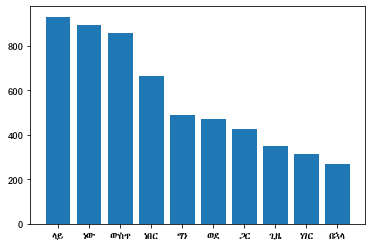

In [196]:
visualize_top_words(corpra_df['Top Words'][0])

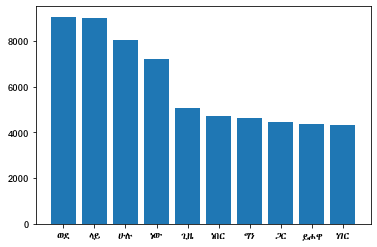

In [197]:
visualize_top_words(corpra_df['Top Words'][1], 10)

## TF-IDF

In [198]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [199]:
def tfidf_vectorize(preprocessor):
    """
    Use Sklearn tfidf vectorizer to transform the text to TF-IDF vectorized format. 
    
    Param:
    preprocessor: the preprocessor we are using. 

    Returns:
    The vocabulary.
    A list of stop words, if any, that qualify under sklearn stopword rules.
    The IDF values of each of the words. 

    """
    vectorizer=TfidfVectorizer(preprocessor=preprocessor)
    vectorizer.fit_transform(corpra_df['Clean Text'])

    return vectorizer.vocabulary_, vectorizer.stop_words_, vectorizer.idf_

In [200]:
vocab, stop_list, idf= tfidf_vectorize(preproc)

In [201]:
print('Total number of words in the vocabulary is: ', len(vocab))

Total number of words in the vocabulary is:  202604


In [202]:
# this will give us the indices of words that are found in all of the files. 
indexes=[i for i, id in enumerate(idf) if id==1]
stop_list=[word for word, index in vocab.items() if index in indexes]
len(stop_list)

561

In [203]:
def match_top_words(stop_list, top_words):
    """
    From the list of words that exist in each of the documents, we can further filter our list by selecting words that are in the top words list of the documents.
    
    Params:
    stop_list: list of words found in every document.
    top_words: Series object with list of tuples of top words and their frequency for each document.

    Returns:
    stop_words: words that are found in all the documents and in the top words.
    """
    top_word=[]
    for top in top_words:
        top_word.append([x[0] for x in top])
    top_word=[sub  for main in top_word for sub in main ]
    stop_words=[k for k in set(stop_list).intersection(set(top_word))]
    return stop_words

In [204]:
stop_words=match_top_words(stop_list, corpra_df['Top Words'])

In [205]:
def save(stop_list, stop_words):
    """
    Saves the stop_list and the filtered stop_words.

    Params:
    stop_list: list of words in every document.
    stop_words: list of words in every document as well as top words list.
    """
    with open('stop_list_all_files.txt', 'w') as file:
        file.write('\n'.join(stop_list)) 
        file.close()
    with open('stop_list_top_word.txt', 'w') as file:
        file.write('\n'.join(stop_words))
        file.close()

In [206]:
save(stop_list, stop_words)

In [207]:
def save_top_words(top_words):
    """
    Save individual documents most frequent words if necessary. Can be used as domain specific stop_words.append

    Params:
    top_words: list of tupels of top words in a document along with their frequency. 
    """
    top_word=[x[0] for x in top_words]
    with open('top_words.txt', 'w') as file:
        file.write('\n'.join(top_word))
        file.close

In [208]:
save_top_words(corpra_df['Top Words'][0])

In [209]:
# compare with existing stopword list
def compare(path, stop_list):
    """
    Compare the stop words we have curated with an existing list.append

    Params:
    path: path to the file with a list of stop words.

    Returns:
    common_words: stop words found in common with the ones we have curated.
    diff_words: stop words that are only found in the list we are trying to compare with. 
    """
    stop_compare=open(path, 'r').read()
    stop_compare=set(preproc(stop_compare).split())
    print('Number of stop words in list: ' ,len(stop_compare))
    print('Number of stop words identified: ' ,len(stop_list))
    common_words = stop_compare.intersection(set(stop_list))
    diff_words=  stop_compare - set(stop_list)
    print('There are ', len(common_words), ' common stopwords')
    print('There are ', len(diff_words), ' non common words')
    return common_words, diff_words 

In [211]:
comm, diff =compare('stopwords.txt', stop_words)

Number of stop words in list:  302
Number of stop words identified:  143
There are  70  common stopwords
There are  232  non common words


In [212]:
print(comm)

{'ምን', 'ሆኖ', 'አሁን', 'ብቻ', 'እኔ', 'ሆኑ', 'ቢሆን', 'ቦታ', 'ነገሮች', 'ሆኖም', 'ሌላ', 'ላይ', 'ብሎ', 'ሰው', 'ከሆነ', 'ይህ', 'ይህን', 'በላይ', 'ሰዎች', 'ይሁን', 'አንድ', 'ቁጥር', 'ከተማ', 'ወይም', 'ነው', 'ቀን', 'ማድረግ', 'ጊዜ', 'መልካም', 'ዋና', 'ፊት', 'ሲሉ', 'ምክንያት', 'ልጅ', 'ሲል', 'ድረስ', 'ይሆናል', 'እንጂ', 'ያለ', 'ብዙ', 'አይደለም', 'ጉዳይ', 'ደግሞ', 'ስለ', 'ሁሉ', 'ምንም', 'ቤት', 'ይችላል', 'ብዛት', 'እንደ', 'እንዲሁም', 'ክፍል', 'መካከል', 'በኋላ', 'ናቸው', 'ሆነ', 'ግን', 'ጋር', 'ወደ', 'ማለት', 'በዚህ', 'ሲሆን', 'እስከ', 'በፊት', 'ስራ', 'ያለው', 'ነገር', 'ሌሎች', 'ውስጥ', 'ስም'}
